### Kaggle flipekart data scraping EDA analysis

In [1]:
#importing the libraries
#pands used for storing the data in table formate
import pandas as pd
#os is used for access the local files
import os


In [73]:
#read the data from file
data=pd.read_csv("https://www.kaggle.com/datasets/priyankkhanna/flipkart-product-dataset-by-priyank-khanna?select=dataset.csv")
#to show the top 3 rows 
data.head(3)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 2


In [3]:
# how many columns and rows  are there 
data.shape

(12041, 12)

In [4]:
#information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_1      12041 non-null  object 
 1   category_2      12041 non-null  object 
 2   category_3      12041 non-null  object 
 3   title           12023 non-null  object 
 4   product_rating  11961 non-null  float64
 5   selling_price   12013 non-null  object 
 6   mrp             11666 non-null  object 
 7   seller_name     11825 non-null  object 
 8   seller_rating   11827 non-null  float64
 9   description     5021 non-null   object 
 10  highlights      6560 non-null   object 
 11  image_links     12041 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.1+ MB


In [7]:
#selling_price and mrp are in string formate so i extract the numbers
data['selling_price'] = data['selling_price'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
data['mrp'] = data['mrp'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_1      12041 non-null  object 
 1   category_2      12041 non-null  object 
 2   category_3      12041 non-null  object 
 3   title           12023 non-null  object 
 4   product_rating  11961 non-null  float64
 5   selling_price   12013 non-null  float64
 6   mrp             11666 non-null  float64
 7   seller_name     11825 non-null  object 
 8   seller_rating   11827 non-null  float64
 9   description     5021 non-null   object 
 10  highlights      6560 non-null   object 
 11  image_links     12041 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.1+ MB


In [9]:
data.head(3)

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights,image_links
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,16150.0,40000.0,I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...,https://rukminim1.flixcart.com/image/612/612/x...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,1520.0,6000.0,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...,https://rukminim1.flixcart.com/image/612/612/x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,590.0,1990.0,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g,https://rukminim1.flixcart.com/image/612/612/x...


In [10]:
#to check if any null values are there or not 
data.isnull().sum()

category_1           0
category_2           0
category_3           0
title               18
product_rating      80
selling_price       28
mrp                375
seller_name        216
seller_rating      214
description       7020
highlights        5481
image_links          0
dtype: int64

In [11]:
#percentage wise null values
round(data.isnull().sum()/len(data)*100,2)

category_1         0.00
category_2         0.00
category_3         0.00
title              0.15
product_rating     0.66
selling_price      0.23
mrp                3.11
seller_name        1.79
seller_rating      1.78
description       58.30
highlights        45.52
image_links        0.00
dtype: float64

In [12]:
#description column has  58% data is null but our analysis  it's not requierd so drop 
data=data.dropna()

In [13]:
data.drop(columns=['description','highlights'],inplace=True)

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
product_rating,4439.0,4.099887,0.334062,1.0,3.9,4.1,4.3,5.0
selling_price,4439.0,17788.112187,60167.800839,510.0,2590.0,4100.0,8490.0,1016450.0
mrp,4439.0,33644.645190,95385.593477,650.0,5990.0,9990.0,19990.0,1399990.0
seller_rating,4439.0,4.439423,0.394807,3.0,4.2,4.5,4.8,5.0


In [26]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

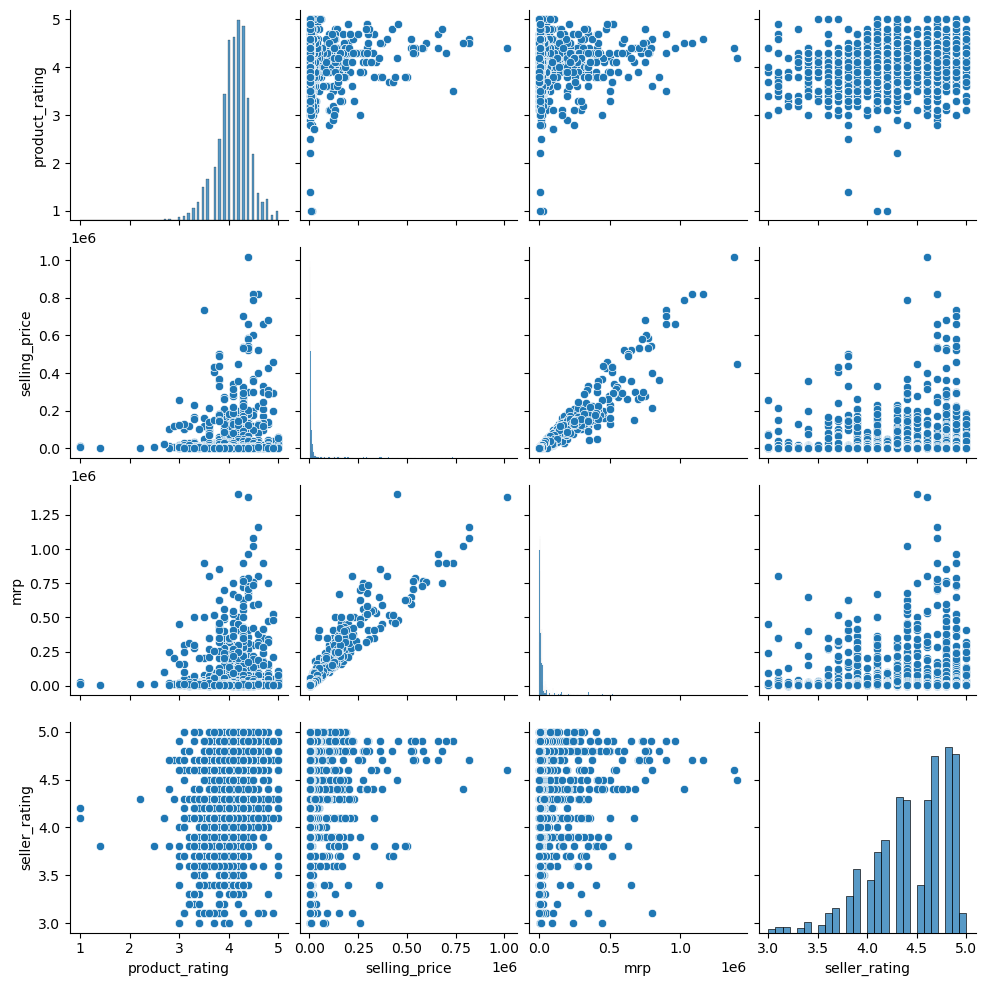

In [27]:
sb.pairplot(data)

<h3> by observing above data there is a corelation between the seller price and MRP</h3>
<h3>Most of the products rating  and seller rateing are between 3 to 4.5</h3>

### checking correlation   matrices

<AxesSubplot:>

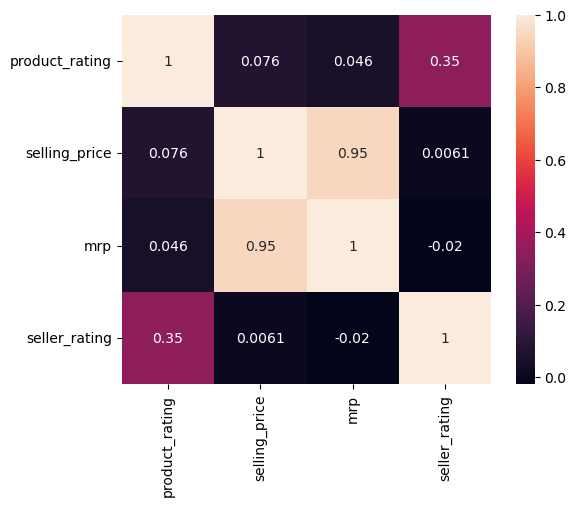

In [34]:
sb.heatmap(data=data.corr(), square=True , annot=True, cbar=True)

In [47]:
ex=data.groupby('seller_rating').agg({'category_1':'count'}).reset_index().sort_values(by='category_1',ascending=False)
ex

,seller_rating,category_1
18,4.8,582
19,4.9,562
17,4.7,554
13,4.3,424
14,4.4,417
16,4.6,416
12,4.2,291
11,4.1,254
9,3.9,198
10,4.0,165


<AxesSubplot:xlabel='category_1', ylabel='seller_rating'>

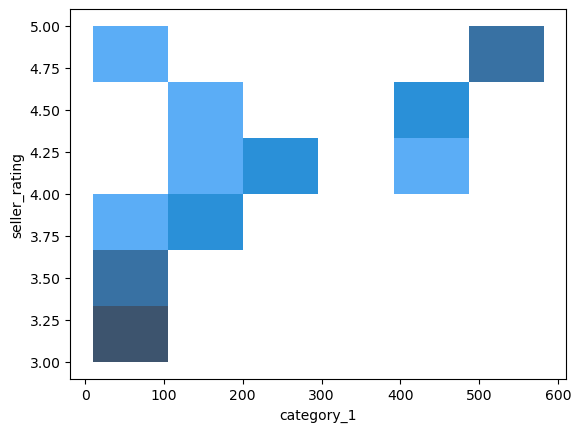

In [51]:
sb.histplot(data=ex,x='category_1',y='seller_rating')

In [61]:
ex2=data.groupby("category_1").count().reset_index()
ex2

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,image_links
0,Bady and Kids,826,826,826,826,826,826,826,826,826
1,Electronics,539,539,539,539,539,539,539,539,539
2,Home and Furniture,1377,1377,1377,1377,1377,1377,1377,1377,1377
3,Men's wear,309,309,309,309,309,309,309,309,309
4,"Sports, Books and More",1030,1030,1030,1030,1030,1030,1030,1030,1030
5,Women's wear,358,358,358,358,358,358,358,358,358


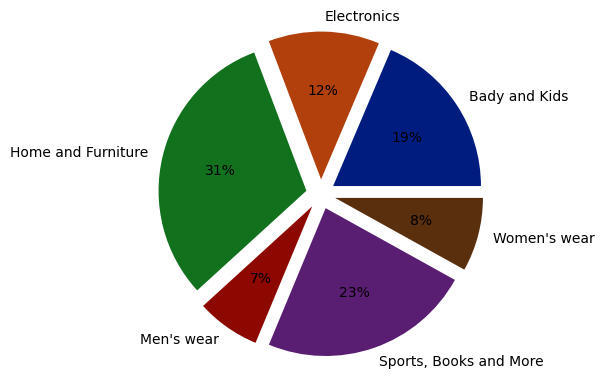

In [72]:
plt.pie(ex2['category_2'], labels=ex2['category_1'],colors=seaborn.color_palette('dark'),explode=[0.1]*len(ex2['category_1']),autopct='%.0f%%');

#### Most of them buy home and furnitures 

### Thank you..